First, I read the data from excel file into a dataframe called df_raw. Skip the label row.

In [1]:
import pandas as pd

headers = ["Movie Title", "Opening Gross Sales ($ millions)", "Total Gross Sales ($ millions)", "Number of Theaters", "Weeks in Release"]

df_raw = pd.read_excel("Movies2016.xlsx", header=None, names=headers, skiprows=1)

print(df_raw)

                     Movie Title  Opening Gross Sales ($ millions)  \
0   Rogue One: A Star Wars Story                            155.08   
1                   Finding Dory                            135.06   
2     Captain America: Civil War                            179.14   
3        The Secret Life of Pets                            104.35   
4         The Jungle Book (2016)                            103.26   
..                           ...                               ...   
95                    The Forest                             12.74   
96                Ben-Hur (2016)                             11.20   
97                     The Witch                              8.80   
98          Bridget Jones's Baby                              8.57   
99         Kevin Hart: What Now?                             11.77   

    Total Gross Sales ($ millions)  Number of Theaters  Weeks in Release  
0                           532.18                4157                20  
1        

Next, separate values of rows and columns into bins. Use pd.crosstab to create the crosstabulation, set margins=True to calculate the total. All NaN entries will be set to 0 with fillna(0).

In [3]:
list_row = []
for i in range(0,181):
    if i % 10 == 0:
        list_row.append(i)

df_raw['bin_columns'] = pd.cut(df_raw['Number of Theaters'], [0,1000,2000,3000,4000,5000])
df_raw['bin_rows'] = pd.cut(df_raw['Opening Gross Sales ($ millions)'], list_row)

pd.crosstab(index=df_raw['bin_rows'], columns=df_raw['bin_columns'], rownames=["Opening Gross Sales ($ millions)"], colnames=["Number of Theaters"], margins=True, margins_name="Total").fillna(0)


Number of Theaters,"(1000, 2000]","(2000, 3000]","(3000, 4000]","(4000, 5000]",Total
Opening Gross Sales ($ millions),,,,,
"(0, 10]",5,4,5,0,14
"(10, 20]",0,15,19,0,34
"(20, 30]",0,3,19,0,22
"(30, 40]",0,1,7,2,10
"(40, 50]",0,0,3,2,5
"(50, 60]",0,0,2,1,3
"(60, 70]",0,0,0,1,1
"(70, 80]",0,0,1,1,2
"(80, 90]",0,0,1,0,1


Now, construct the scatter plot with the previously built df_raw. There are two datapoints to annotate: (1) the highest Opening Gross Sales (OGS) of all data and (2) the highest OGS of all movies displayed in <4000 theaters.

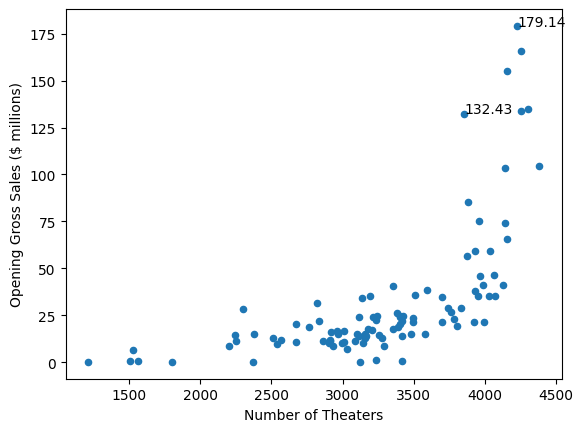

In [2]:
scatter_plot1 = df_raw.plot.scatter(x="Number of Theaters", y="Opening Gross Sales ($ millions)")

max_os_4000 = 0
for idx, row in df_raw.iterrows():
    if row['Number of Theaters'] < 4000:
        if row['Opening Gross Sales ($ millions)'] > max_os_4000:
            max_os_4000 = row['Opening Gross Sales ($ millions)']

for idx, row in df_raw.iterrows():
    if row['Opening Gross Sales ($ millions)'] == max(df_raw['Opening Gross Sales ($ millions)']):
        scatter_plot1.annotate(row['Opening Gross Sales ($ millions)'], (row['Number of Theaters'], row['Opening Gross Sales ($ millions)']))
    if row['Opening Gross Sales ($ millions)'] == max_os_4000:
        scatter_plot1.annotate(row['Opening Gross Sales ($ millions)'], (row['Number of Theaters'], row['Opening Gross Sales ($ millions)']))

For the second part, create a new cross tabulation for the Total Cross Sales ($ millions) vs. the number of weeks the movie was in release. The same strategy as above is done.

In [5]:
list_column2 = []
for i in range(6,47,10):
    list_column2.append(i)

list_row2 = []
for i in range (20,621, 100):
    list_row2.append(i)

df_raw['bin_columns2'] = pd.cut(df_raw['Weeks in Release'], list_column2)
df_raw['bin_rows2'] = pd.cut(df_raw['Total Gross Sales ($ millions)'], list_row2)

pd.crosstab(index=df_raw['bin_rows2'], columns=df_raw['bin_columns2'], rownames=["Total Gross Sales ($ millions)"], colnames=["Number of Weeks"], margins=True, margins_name="Total").fillna(0)


Number of Weeks,"(6, 16]","(16, 26]","(26, 36]","(36, 46]",Total
Total Gross Sales ($ millions),,,,,
"(20, 120]",60,15,1,0,76
"(120, 220]",4,6,0,1,11
"(220, 320]",0,4,0,0,4
"(320, 420]",2,5,0,0,7
"(420, 520]",0,1,0,0,1
"(520, 620]",0,1,0,0,1
Total,66,32,1,1,100


Then, draw a new scatter plot scatter_plot2 and display the two datapoints:
- The datapoint that had the highest Total Gross Sales out of all the data.
- The datapoint that had played for the longest in release out of all the data.

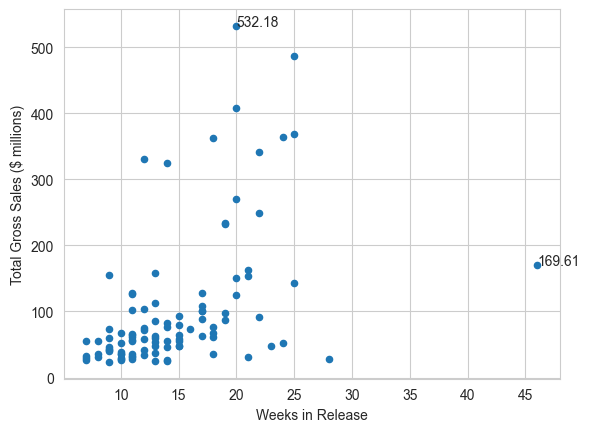

In [6]:
scatter_plot2 = df_raw.plot.scatter(x="Weeks in Release", y="Total Gross Sales ($ millions)")

for idx, row in df_raw.iterrows():
    if row['Total Gross Sales ($ millions)'] == max(df_raw['Total Gross Sales ($ millions)']):
        scatter_plot2.annotate(row['Total Gross Sales ($ millions)'], (row['Weeks in Release'], row['Total Gross Sales ($ millions)']))
    if row['Weeks in Release'] == max(df_raw['Weeks in Release']):
        scatter_plot2.annotate(row['Total Gross Sales ($ millions)'], (row['Weeks in Release'], row['Total Gross Sales ($ millions)']))

For the third part, create a new dataframe new_df from the existing dataframe df_raw by selecting all records with Opening Gross Sales > $50 million. The new dataframe is shown as below.

In [7]:
new_df = df_raw.loc[df_raw["Opening Gross Sales ($ millions)"] > 50, ["Movie Title", "Opening Gross Sales ($ millions)", "Total Gross Sales ($ millions)", "Number of Theaters", "Weeks in Release"]]

print(new_df)

                                Movie Title  Opening Gross Sales ($ millions)  \
0              Rogue One: A Star Wars Story                            155.08   
1                              Finding Dory                            135.06   
2                Captain America: Civil War                            179.14   
3                   The Secret Life of Pets                            104.35   
4                    The Jungle Book (2016)                            103.26   
5                                  Deadpool                            132.43   
6                                  Zootopia                             75.06   
7        Batman v Superman: Dawn of Justice                            166.01   
8                             Suicide Squad                            133.68   
10                                    Moana                             56.63   
11  Fantastic Beasts and Where To Find Them                             74.40   
12                          

To classify movies into superhero or not_superhero category, assign superhero movie key with value 1 and non-superhero movie key with value 2.

In [8]:
superhero_dict = {"superhero": ['X-Men: Apocalypse', 'Doctor Strange', 'Deadpool', "Suicide Squad", "Batman v Superman: Dawn of Justice", "Captain America: Civil War"]}

classified_dict = {}

for movie in new_df["Movie Title"]:
    if movie in superhero_dict["superhero"]:
        classified_dict[movie] = 1
    else:
        classified_dict[movie] = 2

I later use binning to divide the two groups and create a cross tabulation with those bins.

In [9]:
bin_column_labels = ["Under $100M for Opening Gross Sales", "Over $100M for Opening Gross Sales"]
new_df['bin_column'] = pd.cut(new_df['Opening Gross Sales ($ millions)'], [50,100,200], labels=bin_column_labels)

bin_row_labels = ["superhero", "not superhero"]
new_df['superhero'] = classified_dict.values()
new_df['bin_row'] = pd.cut(new_df['superhero'],[0,1,2], labels=bin_row_labels)

pd.crosstab(index=new_df['bin_row'], columns=new_df['bin_column'], rownames= ["Superhero?"], colnames=["Opening Gross Sales ($ millions)"], margins=True, margins_name="Total")

Opening Gross Sales ($ millions),Under $100M for Opening Gross Sales,Over $100M for Opening Gross Sales,Total
Superhero?,,,
superhero,2,4,6
not superhero,5,4,9
Total,7,8,15
